In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/log/'

Mounted at /content/drive


In [ ]:
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   38G   70G  36% /


## **Evasion Rate**

{1: 131, 2: 379, 3: 530, 4: 589, 5: 625, 6: 652, 7: 662, 8: 668, 9: 672, 10: 674, 11: 677, 12: 686, 13: 688, 14: 699, 15: 702, 16: 705, 17: 708, 18: 710, 19: 713, 20: 715, 21: 717, 22: 719, 23: 722, 24: 723, 25: 725, 26: 725, 27: 725, 28: 726, 29: 728, 30: 729, 31: 731, 32: 737, 33: 741, 34: 746, 35: 749, 36: 756, 37: 762, 38: 764, 39: 766, 40: 769, 41: 771, 42: 774, 43: 775, 44: 777, 45: 781, 46: 783, 47: 787, 48: 790, 49: 791, 50: 792, 51: 792, 52: 793, 53: 795, 54: 795, 55: 798, 56: 798, 57: 799, 58: 800, 59: 801, 60: 803}
{1: 263, 2: 600, 3: 731, 4: 791, 5: 815, 6: 829, 7: 834, 8: 837, 9: 840, 10: 841, 11: 844, 12: 846, 13: 850, 14: 856, 15: 857, 16: 857, 17: 859, 18: 860, 19: 864, 20: 865, 21: 870, 22: 875, 23: 884, 24: 892, 25: 902, 26: 909, 27: 917, 28: 927, 29: 935, 30: 941, 31: 942, 32: 946, 33: 951, 34: 955, 35: 956, 36: 959, 37: 961, 38: 962, 39: 963, 40: 963, 41: 963, 42: 964, 43: 965, 44: 965, 45: 965, 46: 966, 47: 967, 48: 967, 49: 968, 50: 968, 51: 968, 52: 968, 53: 968,

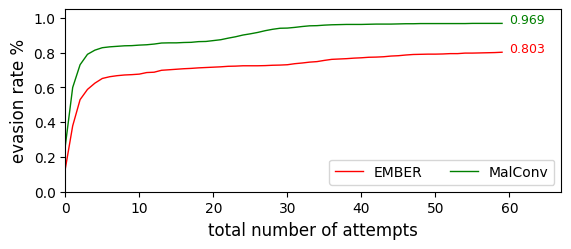

In [ ]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

def get_from_log(log):
    dict_pull_to_count = {x:0 for x in range(1, 61)}
    with open(log, 'r+') as fp:
        for line in fp:
            if '### Evade!' in line:
                line = line.strip()
                pull = int(line.split(' ')[-1][:-1])
                for idx in range(pull, 61):
                    dict_pull_to_count[idx] += 1
    print(dict_pull_to_count)
    list_rate = []
    for idx in range(1, 61):
        list_rate.append(dict_pull_to_count[idx]/1000)
    return list_rate

def main():
    #av = sys.argv[1]

    #y1_list_rate = get_from_log('/home/azureuser/code/MAB-malware/output_' + av + '/rewriter.log')
    y1_list_rate = get_from_log(data_dir + 'ember/rewriter.log')
    y2_list_rate = get_from_log(data_dir + 'malconv/rewriter.log')

    x1 = np.array(range(len(y1_list_rate)))
    x2 = np.array(range(len(y2_list_rate)))
    #x3 = np.array(range(len(y3_list_rate)))

    fig, ax = plt.subplots()
    ax.plot(x1, y1_list_rate, fillstyle='none', linewidth=1, color='red', label='EMBER')
    ax.plot(x2, y2_list_rate, fillstyle='none', linewidth=1, color='green', label='MalConv')
    #ax.plot(x3, y3_list_rate, fillstyle='none', linewidth=1, color='red', label='TS')
    axes = plt.gca()
    axes.set_ylim([0, 1.05])
    axes.set_xlim([0, 67])

    plt.annotate(str(y1_list_rate[-1]), (60,y1_list_rate[-1]), color='red', fontsize=9)
    plt.annotate(str(y2_list_rate[-1]), (60,y2_list_rate[-1]), color='green', fontsize=9)
    #plt.annotate(str(y3_list_rate[-1]), (60,y3_list_rate[-1]-3), color='red', fontsize=9)

    plt.xlabel('total number of attempts', fontsize=12)
    plt.ylabel('evasion rate %', fontsize=12)
    ax.legend(loc='lower right', ncol=2)#, framealpha=0)
    fig.subplots_adjust(bottom=0.5)

    #plt.show()
    plt.savefig("evasion_rate - MAB-malware.pdf")

if __name__ == '__main__':
    main()


{1: 263, 2: 600, 3: 731, 4: 791, 5: 815, 6: 829, 7: 834, 8: 837, 9: 840, 10: 841, 11: 844, 12: 846, 13: 850, 14: 856, 15: 857, 16: 857, 17: 859, 18: 860, 19: 864, 20: 865, 21: 870, 22: 875, 23: 884, 24: 892, 25: 902, 26: 909, 27: 917, 28: 927, 29: 935, 30: 941, 31: 942, 32: 946, 33: 951, 34: 955, 35: 956, 36: 959, 37: 961, 38: 962, 39: 963, 40: 963, 41: 963, 42: 964, 43: 965, 44: 965, 45: 965, 46: 966, 47: 967, 48: 967, 49: 968, 50: 968, 51: 968, 52: 968, 53: 968, 54: 968, 55: 968, 56: 969, 57: 969, 58: 969, 59: 969, 60: 969}


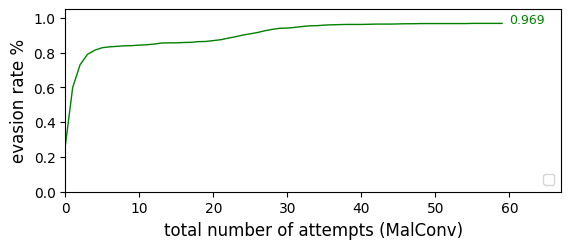

<Figure size 640x480 with 0 Axes>

In [ ]:
#av = sys.argv[1]

#y1_list_rate = get_from_log('/home/azureuser/code/MAB-malware/output_' + av + '/rewriter.log')
#y1_list_rate = get_from_log(data_dir + 'ember/rewriter.log')
y2_list_rate = get_from_log(data_dir + 'malconv/rewriter.log')

#x1 = np.array(range(len(y1_list_rate)))
x2 = np.array(range(len(y2_list_rate)))
#x3 = np.array(range(len(y3_list_rate)))

fig, ax = plt.subplots()
#ax.plot(x1, y1_list_rate, fillstyle='none', linewidth=1, color='red', label='MAB-malware')
ax.plot(x2, y2_list_rate, fillstyle='none', linewidth=1, color='green', label='')
#ax.plot(x3, y3_list_rate, fillstyle='none', linewidth=1, color='red', label='TS')
axes = plt.gca()
axes.set_ylim([0, 1.05])
axes.set_xlim([0, 67])

#plt.annotate(str(y1_list_rate[-1]), (60,y1_list_rate[-1]), color='red', fontsize=9)
plt.annotate(str(y2_list_rate[-1]), (60,y2_list_rate[-1]), color='green', fontsize=9)
#plt.annotate(str(y3_list_rate[-1]), (60,y3_list_rate[-1]-3), color='red', fontsize=9)

plt.xlabel('total number of attempts (MalConv)', fontsize=12)
plt.ylabel('evasion rate %', fontsize=12)
ax.legend(loc='lower right', ncol=2)#, framealpha=0)
fig.subplots_adjust(bottom=0.5)

plt.show()
plt.savefig("evasion_rate - malconv.pdf")

## **Changed byte**

ember
/content/drive/My Drive/minimal_ember/
217
623802a274e0b100e33fb2a50e0bef7513f7fd59e856c568dc06cb86a21810be.SR1 1
cf210cdcd245d1aeee781aaba2bb318e27443f1c18ea2e59aebf88a8c3209b9a.SR1 1
51b79da4755f8c1b5c1ae0acfcf8f9ca037f15b2b997768ac91db6c23acb0d55.SR 4
[1, 1, 4, 3072, 13312, 13312, 14848, 14848, 14848, 18944, 18944, 23040, 23040, 49152, 78336, 88064, 88064, 88064, 88064, 88064, 88064, 88064, 163840, 163840, 163840, 197120, 216576, 216580, 221184, 221184, 221184, 221184, 221184, 221184, 251392, 251392, 251392, 290304, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 368128, 381440, 417280, 479232, 479232, 479232, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 584192, 58419

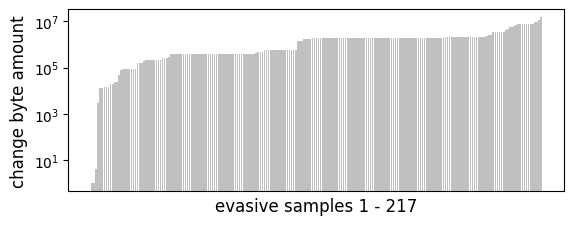

malconv
/content/drive/My Drive/minimal_malconv/
78
[4593, 65536, 79872, 79872, 79872, 79872, 79872, 79872, 106496, 106496, 109568, 136192, 173056, 173056, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 179712, 181760, 201216, 213504, 308736, 334848, 334848, 488448, 577536, 612352, 612352, 612352, 612352, 612352, 612352, 748544, 771584, 771584, 942592, 1078784]
less_100_evade_count: 0
less_1_evade_count: 0


<Figure size 640x480 with 0 Axes>

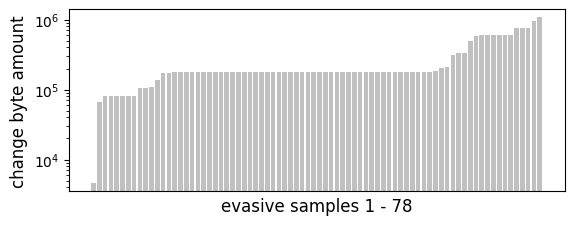

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

dict_av_to_path = {
#        'ember_2019': '/home/wei/code/adversarial_malware/final_output/our/ember_2019/output_ember_2019_holdout_TS_parent/mic_minimizer_evasive/',
#        'ember_2020': '/home/wei/code/adversarial_malware/final_output/our/ember_2020/output_ember_2020_holdout_TS_parent/mic_minimizer_evasive_scan/',
#        'malconv': '/home/wei/code/adversarial_malware/final_output/our/malconv/output_malconv_holdout_TS_parent/mic_minimizer_evasive/',
#        'clamav': '/home/wei/code/adversarial_malware/final_output/our/clamav/output_clamav_1000_TS_parent/mic_minimizer_evasive/',
#        'avast': '/home/wei/code/adversarial_malware/final_output/our/avast/output_avast_1000_TS_parent/mic_minimizer_evasive/',
#        'avira': '/home/wei/code/adversarial_malware/final_output/our/avira/output_avira_1000_TS_parent_91/mic_minimizer_evasive/',
#        'bitdefender': '/home/wei/code/adversarial_malware/final_output/our/bitdefender/output_bitdefender_1000_TS_parent/mic_minimizer_evasive_TS_parent_scan/'
        'ember': '/content/drive/My Drive/minimal_ember/',
        'malconv': '/content/drive/My Drive/minimal_malconv/'
        }

def main():
    for av, path in dict_av_to_path.items():
        print('='*40)
        print(av)
        list_diff_count = []
        less_100_evade_count = 0
        less_1_evade_count = 0
        less_1_dict_action_to_exe = {}
        print(path)
        list_exe = os.listdir(path)
        print(len(list_exe))
        for exe in list_exe:
            sha256 = exe.split('.')[0]
            list_action = [x for x in exe.split('.') if len(x) == 2 or (len(x) == 3 and x != 'exe')]
            #print(list_action)
            diff_count = 0
            exe_path_ori = '/content/drive/My Drive/Malware-dataset/' + sha256
            exe_path = path + exe
            fp1 = open(exe_path_ori, 'rb')
            fp2 = open(exe_path, 'rb')
            content1 = fp1.read()
            content2 = fp2.read()
            for idx, byte in enumerate(content2):
                if idx >= len(content1) or byte != content1[idx]:
                    diff_count += 1
            fp1.close()
            fp2.close()
            #if diff_count < 100:
            if diff_count < 10:
                print(exe, diff_count)
            if diff_count < 100:
                less_100_evade_count += 1
            if diff_count == 1:
                less_1_evade_count += 1
                action = list_action[0]
                if action not in less_1_dict_action_to_exe:
                    less_1_dict_action_to_exe[action] = []
                less_1_dict_action_to_exe[action].append(exe)
            list_diff_count.append(diff_count)
        list_diff_count.sort()
        print(list_diff_count)
        #with open('%s' %av, 'w') as fp:
        #    for diff in list_diff_count:
        #        fp.write('%d\n' %diff)
        print('less_100_evade_count:', less_100_evade_count)
        print('less_1_evade_count:', less_1_evade_count)
        for action, list_exe in less_1_dict_action_to_exe.items():
            print(action, len(list_exe), list_exe)
        plot(list_diff_count, av)

def plot(y,av):
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.set_yscale('log')

    plt.xlabel('evasive samples %d - %d' %(1, len(y)), fontsize=12)
    plt.ylabel('change byte amount', fontsize=12)

    plt.bar(x, y, color='silver')
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    fig.subplots_adjust(bottom=0.5)
    plt.show()
    plt.savefig('Changed byte - %s' %av.lower())

if __name__ == '__main__':
    main()

## **Action Sequence**

ember
/content/drive/My Drive/minimal_ember/
217
[OA] 84.7926267281106
[OA,OA] 5.990783410138248
[OA,OA,OA] 2.3041474654377883
[OA,SR] 1.8433179723502304
[SSR1] 0.9216589861751152
[OA,SSR1] 0.9216589861751152
[OA,OA,SR] 0.9216589861751152


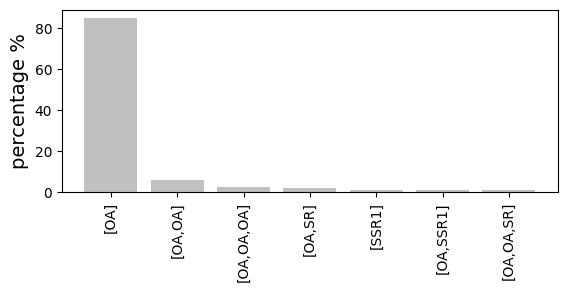

malconv
/content/drive/My Drive/minimal_malconv/
78
[OA] 87.17948717948718
[OA,OA] 6.41025641025641
[OA,OA,OA] 2.564102564102564
[CR] 1.282051282051282
[OA,OA,OA,OA] 1.282051282051282
[OA,OA,OA,OA,OA] 1.282051282051282


<Figure size 640x480 with 0 Axes>

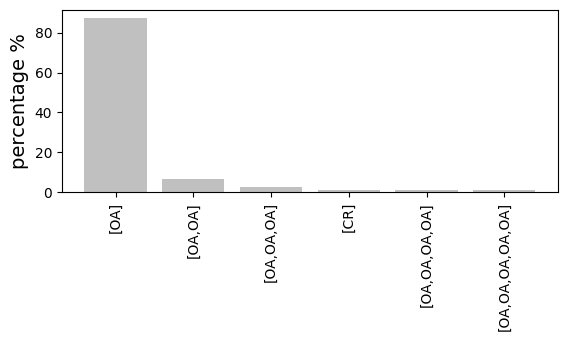

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

dict_av_to_path = {
#        'ember_2019': '/home/wei/code/adversarial_malware/final_output/our/ember_2019/output_ember_2019_holdout_TS_parent/mic_minimizer_evasive/',
#        'ember_2020': '/home/wei/code/adversarial_malware/final_output/our/ember_2020/output_ember_2020_holdout_TS_parent/mic_minimizer_evasive_scan/',
#        'malconv': '/home/wei/code/adversarial_malware/final_output/our/malconv/output_malconv_holdout_TS_parent/mic_minimizer_evasive/',
#        'clamav': '/home/wei/code/adversarial_malware/final_output/our/clamav/output_clamav_1000_TS_parent/mic_minimizer_evasive/',
#        'avast': '/home/wei/code/adversarial_malware/final_output/our/avast/output_avast_1000_TS_parent/mic_minimizer_evasive/',
#        'avira': '/home/wei/code/adversarial_malware/final_output/our/avira/output_avira_1000_TS_parent_91/mic_minimizer_evasive/',
#        'bitdefender': '/home/wei/code/adversarial_malware/final_output/our/bitdefender/output_bitdefender_1000_TS_parent/mic_minimizer_evasive_TS_parent_scan/'
        'ember': '/content/drive/My Drive/minimal_ember/',
        'malconv': '/content/drive/My Drive/minimal_malconv/'
        }


def action_rename(action_name):
    action_name = action_name.replace('O1', 'OA1')
    action_name = action_name.replace('S1', 'SA1')
    action_name = action_name.replace('R1', 'SR1')
    action_name = action_name.replace('P1', 'SP1')
    action_name = action_name.replace('CP', 'SP1')
    return action_name

dict_av_to_min = {
        'ember':1,
        'ember_2020':1,
        'malconv':0,
        'clamav':0,
        'avast':1,
        'avira':1,
        'bitdefender':3,
        'kaspersky':0#1,
        }

def main():
    for av, path in dict_av_to_path.items():
        dict_action_list_to_count = {}
        print('='*40)
        print(av)
        list_action = []
        print(path)
        list_exe = os.listdir(path)
        print(len(list_exe))
        for exe in list_exe:
            list_action = [action_rename(x) for x in exe.split('.') if len(x) == 2 or (len(x) == 3 and x != 'exe')]
            list_action.sort()
            #if len(list_action) > 3:
            #    continue
            list_action = str(list_action).replace('\'', '').replace(' ', '')
            if list_action not in dict_action_list_to_count:
                dict_action_list_to_count[list_action] = 0
            dict_action_list_to_count[list_action] += 1

        #listofTuples = sorted(dict_action_list_to_count.items(), key=lambda x:(len(x[0]), -x[1]))
        dict_larger = {}
        total_count = 0
        for k,v in dict_action_list_to_count.items():
            total_count += v
        for k,v in dict_action_list_to_count.items():
            if v > dict_av_to_min[av]:       # debug!
                dict_larger[k] = v/total_count * 100
        listofTuples = sorted(dict_larger.items(), key=lambda x:(-x[1]))

        y = []
        label = []
        for elem in listofTuples :
            print(elem[0], elem[1] )
            y.append(elem[1])
            label.append(elem[0])
        x = np.arange(len(y))
        fig, ax = plt.subplots()

        #plt.xlabel('action combinations', fontsize=12)
        #plt.ylabel('# evasive sample', fontsize=14)
        plt.ylabel('percentage %', fontsize=14)

        plt.bar(x, y, color='silver')
        #plt.bar(x, y, color='white', edgecolor='gray')
        #plt.xticks(x, label, rotation=90, fontsize=14)
        plt.xticks(x, label, rotation=90)
        fig.subplots_adjust(bottom=0.5)
        plt.show()
        plt.savefig('combination_%s.pdf' %av.lower())

if __name__ == '__main__':
    main()

ember
{'file hash': 0.0, 'section hash': 0.0, 'section count': 0.0, 'section name': 5.701754385964912, 'section padding': 0.0, 'debug': 0.0, 'checksum': 0.0, 'certificate': 0.0, 'code seq': 0.43859649122807015, 'data dist': 93.85964912280701}
malconv
{'file hash': 0.0, 'section hash': 0.0, 'section count': 0.0, 'section name': 0.0, 'section padding': 0.0, 'debug': 0.0, 'checksum': 0.0, 'certificate': 0.0, 'code seq': 1.282051282051282, 'data dist': 98.71794871794873}
['file hash', 'section hash', 'section count', 'section name', 'section padding', 'debug', 'checksum', 'certificate', 'code seq', 'data dist']
[[0.0, 0.0, 0.0, 5.701754385964912, 0.0, 0.0, 0.0, 0.0, 0.43859649122807015, 93.85964912280701], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.282051282051282, 98.71794871794873]]
['file hash', 'section hash', 'section count', 'section name', 'section padding', 'debug', 'checksum', 'certificate', 'code seq', 'data dist']
[[ 0.          0.          0.          5.70175439  0.          0.

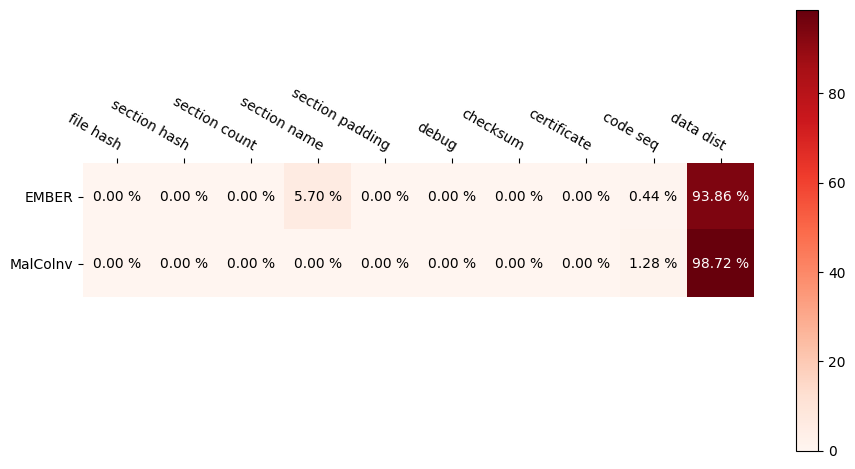

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


dict_av_to_path = {
#        'ember_2019': '/home/wei/code/adversarial_malware/final_output/our/ember_2019/output_ember_2019_holdout_TS_parent/mic_minimizer_evasive/',
#        'ember_2020': '/home/wei/code/adversarial_malware/final_output/our/ember_2020/output_ember_2020_holdout_TS_parent/mic_minimizer_evasive_scan/',
#        'malconv': '/home/wei/code/adversarial_malware/final_output/our/malconv/output_malconv_holdout_TS_parent/mic_minimizer_evasive/',
#        'clamav': '/home/wei/code/adversarial_malware/final_output/our/clamav/output_clamav_1000_TS_parent/mic_minimizer_evasive/',
#        'avast': '/home/wei/code/adversarial_malware/final_output/our/avast/output_avast_1000_TS_parent/mic_minimizer_evasive/',
#        'avira': '/home/wei/code/adversarial_malware/final_output/our/avira/output_avira_1000_TS_parent_91/mic_minimizer_evasive/',
#        'bitdefender': '/home/wei/code/adversarial_malware/final_output/our/bitdefender/output_bitdefender_1000_TS_parent/mic_minimizer_evasive_TS_parent_scan/'
        'ember': '/content/drive/My Drive/minimal_ember/',
        'malconv': '/content/drive/My Drive/minimal_malconv/'
        }


dict_action_list_to_count = {}
dict_action_to_feature = {
        'OA1': 'file hash',
        'SP1': 'section hash',
        'SA1': 'section count',
        'SR1': 'section name',
        'CP1': 'section hash',
        'OA': 'data dist',
        'SP': 'section padding',
        'SA': 'data dist',
        'SR': 'section name',
        'RC': 'certificate',
        'RD': 'debug',
        'BC': 'checksum',
        'CR': 'code seq'
        }

def get_display_name(av):
    if 'kaspersky' in av:
        display_name = 'AV4'
    elif 'bitdefender' in av:
        display_name = 'AV3'
    elif 'avast' in av:
        display_name = 'AV1'
    elif 'avira' in av:
        display_name = 'AV2'
    elif 'ember' in av:
        display_name = 'EMBER'
    elif 'ember_2019' in av:
        display_name = 'EMBER(T&A)'
    elif 'clamav' in av:
        display_name = 'ClamAV'
    return display_name

def main():
    list_values = []
    for av, path in dict_av_to_path.items():
        dict_feature_to_sha256 = {
                'file hash': set(),
                'section hash': set(),
                'section count': set(),
                'section name': set(),
                'section padding': set(),
                'debug': set(),
                'checksum': set(),
                'certificate': set(),
                'code seq': set(),
                'data dist': set(),
        }
        print('='*40)
        print(av)
        #list_action = []
        #print(path)
        list_exe = os.listdir(path)
        #print(len(list_exe))

        for exe in list_exe:
            sha256 = exe.split('.')[0]
            #print(sha256)
            #list_action = [x.replace('CP', 'C1').replace('RS', 'RC') for x in exe.split('.') if len(x) == 2]
            list_action = [x for x in exe.split('.') if len(x) == 2 or (len(x) == 3 and x != 'exe')]
            list_action.sort()
            for action in list_action:
                if action == 'OA1':
                    if len(list_action) == 1:
                        dict_feature_to_sha256[dict_action_to_feature[action]].add(sha256)
                else:
                    dict_feature_to_sha256[dict_action_to_feature[action]].add(sha256)

        dict_larger = {}
        total_amount = 0
        for k in dict_feature_to_sha256.keys():
            total_amount += len(dict_feature_to_sha256[k])
        for k in dict_feature_to_sha256.keys():
            dict_larger[k] = len(dict_feature_to_sha256[k])/total_amount * 100
        listofTuples = dict_larger.items()
        print(dict_larger)
        list_values.append(list(dict_larger.values()))

        #y = []
        #label = []
        #for elem in listofTuples :
        #    print(elem[0], elem[1] )
        #    y.append(elem[1])
        #    label.append(elem[0])
        #x = np.arange(len(y))
        #fig, ax = plt.subplots()
        #plt.ylabel('percentage %', fontsize=14)

        #plt.bar(x, y, color='silver')
        #plt.xticks(x, label, rotation=90, fontsize=14)
        #fig.subplots_adjust(bottom=0.5)
        ##plt.show()
        #plt.savefig('/home/wei/feature_%s.pdf' %get_display_name(av).lower())
    value_array = None
    features = list(dict_larger.keys())
    print(features)
    print(list_values)
    plot_feature(features, list_values)

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel='', **kwargs):
    '''
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    '''

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va='bottom')

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha='right',
             rotation_mode='anchor')

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=0)
    ax.tick_params(which='minor', bottom=False, left=False)

    return im

def annotate_heatmap(im, data=None, valfmt='{x:.2f}',
                     textcolors=['black', 'white'],
                     threshold=None, **textkw):
    '''
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. '$ {x:.2f}', or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    '''

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment='center',
              verticalalignment='center')
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each 'pixel'.
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            #if i != j:
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
            #else:
            #    kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            #    text = im.axes.text(j, i, '-', **kw)
            #    texts.append(text)

    return texts

def plot_feature(features, list_values):
    #avs = ['EMBER', 'MalColnv', 'ClamAV', 'AV1', 'AV2', 'AV3']
    avs = ['EMBER', 'MalColnv']
    value_array = np.array(list_values)

    print(features)
    print(value_array)
    fig, ax = plt.subplots()

    im = heatmap(value_array, avs, features, ax=ax,
                       #cmap='YlOrBr')
                       cmap='Reds')
    texts = annotate_heatmap(im, valfmt='{x:.2f} %')

    fig.tight_layout()
    fig.set_size_inches(10, 5.5)
    fig.subplots_adjust(top=0.85)
    plt.show()
    #plt.savefig('/home/wei/feature_contribution_heatmap.pdf')

if __name__ == '__main__':
    main()


0, 1
0 1
0, 2
0 2
0, 3
0 3
0, 4
0 4
1, 4
1 4
1, 5
1 5
1, 6
1 6
1, 7
1 7
1, 8
1 8
1, 9
1 9
1, 10
1 10
2, 10
2 10
3, 10
3 10
4, 10
4 10
4, 11
4 11
5, 11
5 11
5, 12
5 12
5, 13
5 13
5, 14
5 14
5, 15
5 15
5, 16
5 16
5, 17
5 17
5, 18
5 18
5, 19
5 19
5, 20
5 20
5, 21
5 21
5, 22
5 22
5, 23
5 23
5, 24
5 24
6, 24
6 24
6, 25
6 25
6, 26
6 26
6, 27
6 27
6, 28
6 28
6, 29
6 29
6, 30
6 30
6, 31
6 31
6, 32
6 32
6, 33
6 33
6, 34
6 34
6, 35
6 35
6, 36
6 36
6, 37
6 37
6, 38
6 38
6, 39
6 39
6, 40
6 40
6, 41
6 41
6, 42
6 42
6, 43
6 43
6, 44
6 44
6, 45
6 45
6, 46
6 46
7, 46
7 46
7, 47
7 47
7, 48
7 48
7, 49
7 49
7, 50
7 50
7, 51
7 51
7, 52
7 52
7, 53
7 53
7, 54
7 54
8, 54
8 54
8, 55
8 55
9, 55
9 55
9, 56
9 56
9, 57
9 57
9, 58
9 58
9, 59
9 59
9, 60
9 60
9, 61
9 61
9, 62
9 62
9, 63
9 63
9, 64
9 64
10, 64
10 64
10, 65
10 65
10, 66
10 66
10, 67
10 67
10, 68
10 68
10, 69
10 69
10, 70
10 70
10, 71
10 71
10, 72
10 72
10, 73
10 73
11, 73
11 73
12, 73
12 73
12, 74
12 74
12, 75
12 75
12, 76
12 76
13, 76
13 76
13, 77
13

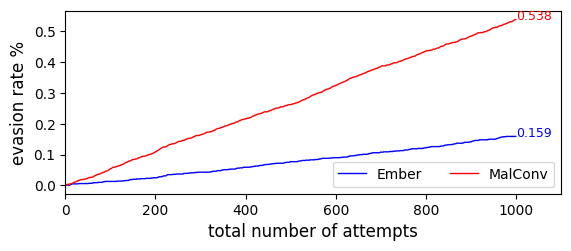

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

def get_from_log(log, r):
    list_rate = []
    with open(log, 'r') as fp:
        for line in fp:
            if 'RESULT' in line:
                line = line.strip()
                print(line.split()[7], line.split()[9])
                total = int(line.split()[5])
                succ = int(line.split()[7][:-1])
                fail = int(line.split()[9])
                print(succ,fail)
                rate = succ / total
                list_rate.append(rate)
    return list_rate + [rate]*(total-len(list_rate)), total

def main():
    av = 'malconv'
    r1 = 1
    r2 = 1
    r3 = 1

    #y1_list_rate, _ = get_from_log('/home/wei/code/adversarial_malware/final_output/our/output_' + av + '_1000_random/rewriter.log', r1)
    ##y2_list_rate, _ = get_from_log('/home/wei/code/adversarial_malware/final_output/our/output_' + av + '_1000_TS/rewriter.log', r2)
    #y3_list_rate, total = get_from_log('/home/wei/code/adversarial_malware/final_output/our/output_' + av + '_1000_TS_parent/rewriter.log', r3)

    y1_list_rate, total = get_from_log(data_dir + 'mcts/rewriter_ember.log', r1)
    #y2_list_rate, _ = get_from_log('/home/wei/code/adversarial_malware/final_output/our/malconv/output_' + av + '_holdout_TS/rewriter.log', r2)#
    y3_list_rate, _ = get_from_log(data_dir + 'mcts/rewriter_malconv.log', r3)

    x1 = np.array(range(len(y1_list_rate)))
    #x2 = np.array(range(len(y2_list_rate)))
    x3 = np.array(range(len(y3_list_rate)))

    fig, ax = plt.subplots()
    ax.plot(x1, y1_list_rate, fillstyle='none', linewidth=1, color='blue', label='Ember')
    #ax.plot(x2, y2_list_rate, fillstyle='none', linewidth=1, color='red', label='TS')
    ax.plot(x3, y3_list_rate, fillstyle='none', linewidth=1, color='red', label='MalConv')
    axes = plt.gca()
    #axes.set_ylim([0,60])
    axes.set_xlim([0, total * 1.1])

    plt.annotate(str(y1_list_rate[-1]), (total,y1_list_rate[-1]), color='blue', fontsize=9)
    #plt.annotate(str(y2_list_rate[-1]), (total,y2_list_rate[-1]-3), color='red', textcoords="offset points", fontsize=9)
    plt.annotate(str(y3_list_rate[-1]), (total,y3_list_rate[-1]), color='red', fontsize=9)

    plt.xlabel('total number of attempts', fontsize=12)
    plt.ylabel('evasion rate %', fontsize=12)
    ax.legend(loc='lower right', ncol=2)#, framealpha=0)
    fig.subplots_adjust(bottom=0.5)

    plt.show()
    #matplotlib.pyplot.title(av);
    #plt.savefig("evasion_rate_of_attempts_%s_our.pdf" %av)

if __name__ == '__main__':
    main()

